Data source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

employee  = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/IBM.csv")


In [4]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
list(employee)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

I will select my variables:
-    Trying to predict: Attrition    
-    Categorical: city_name, Department, Gender
-    Continuous: Age, DistanceFromHome, Education, NumCompaniesWorked,JobSatisfaction, HourlyRate,PerformanceRating,RelationshipSatisfaction,YearsAtCompany,JobLevel
   

First, I will state the research question:
What factors can be used to predict employee attrition?

In [6]:
#How many variables do I have?
    
employee.shape[1] - 2  # one is employee ID and one is predicted

33

In [7]:
#How many datapoints?
employee.shape[0] 

1470

Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
Do I have missing data? If so, how much?
How much variance is there in each of my variables? If you’ve cleaned this dataset yourself, you’ll probably already know the answers to most of these questions.

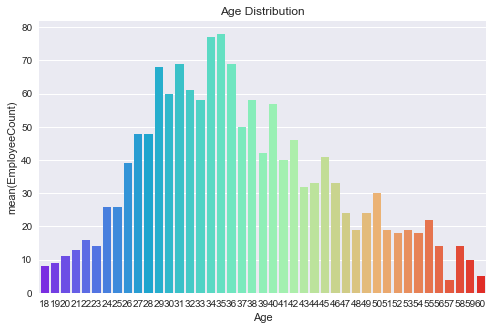

In [8]:
# Summary statistics:
# Looking at the ages of the employees

s = employee.groupby('Age').count()['EmployeeCount']
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(8,5)
g.set_title("Age Distribution")
plt.show()

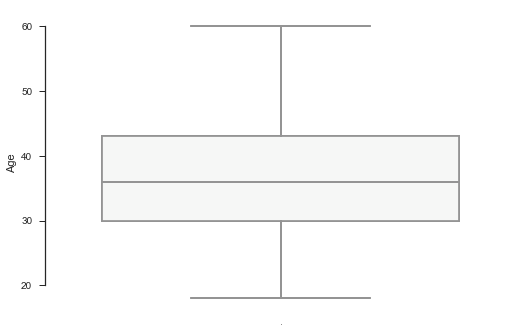

In [18]:
# per suggestion, change to box & whisper
sns.set(style="ticks")

#sns.boxplot(x='EducationField', y='MonthlyIncome',  hue="Gender",data=employee, palette="PRGn")
sns.boxplot( y='Age',  data=employee, palette="PRGn")
sns.despine(offset=12, trim=True)
#plt.legend(loc='upper right')
plt.show()

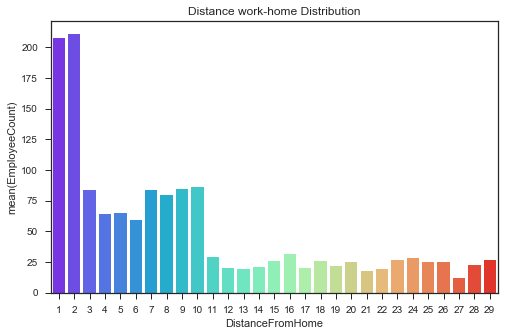

In [19]:
# distance from home
s = employee.groupby('DistanceFromHome').count()['EmployeeCount']
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(8,5)
g.set_title("Distance work-home Distribution")
plt.show()


In [20]:
# Poisson distribution

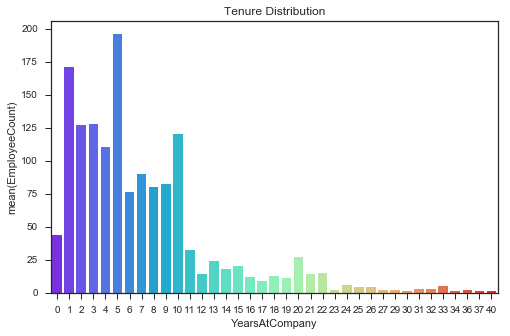

In [112]:
# tenure
s = employee.groupby('YearsAtCompany').count()['EmployeeCount']
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(8,5)
g.set_title("Tenure Distribution")
plt.show()

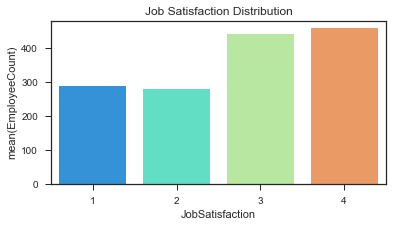

In [111]:
# job sat
s = employee.groupby('JobSatisfaction').count()['EmployeeCount']
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(6,3)
g.set_title("Job Satisfaction Distribution")
plt.show()

In [34]:
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


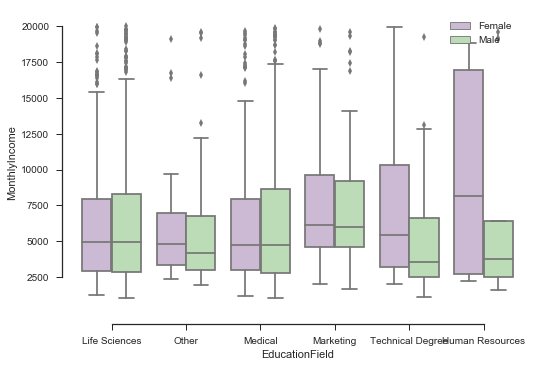

In [155]:
# Plot income vs. education field

sns.set(style="ticks")
#sns.boxplot(x="Department", y="JobSatisfaction", hue="Gender", data=employee, palette="PRGn")
sns.boxplot(x='EducationField', y='MonthlyIncome',  hue="Gender",data=employee, palette="PRGn")
sns.despine(offset=12, trim=True)
plt.legend(loc='upper right')
plt.show()


# Change to ANOVA

In [154]:
# Test Gender vs. variables
# need to change to ANOVA
for col in employee.loc[:,'HourlyRate':'JobLevel'].columns:
    print(col)
    print(stats.ttest_ind(
       employee[employee['Gender'] == 'Female'][col].dropna(),
        employee[employee['Gender'] == 'Male'][col].dropna()
    ))
    
    
for col in employee.loc[:,'PerformanceRating':'YearsWithCurrManager'].columns:
    print(col)
    print(stats.ttest_ind(
       employee[employee['Gender'] == 'Female'][col].dropna(),
        employee[employee['Gender'] == 'Male'][col].dropna()
    ))

HourlyRate
Ttest_indResult(statistic=0.0183257087801641, pvalue=0.98538150856203688)
JobInvolvement
Ttest_indResult(statistic=-0.6882298385064527, pvalue=0.49141679302870467)
JobLevel
Ttest_indResult(statistic=1.5108830669702245, pvalue=0.13103346011991931)
PerformanceRating
Ttest_indResult(statistic=0.53105219707381734, pvalue=0.59546294262941424)
RelationshipSatisfaction
Ttest_indResult(statistic=-0.87641908655393608, pvalue=0.38094563473967258)
StandardHours
Ttest_indResult(statistic=nan, pvalue=nan)
StockOptionLevel
Ttest_indResult(statistic=-0.48723545595844459, pvalue=0.62616422730795152)
TotalWorkingYears
Ttest_indResult(statistic=1.7981963438693473, pvalue=0.072351284437702515)
TrainingTimesLastYear
Ttest_indResult(statistic=1.4872130264975696, pvalue=0.13717330428095065)
WorkLifeBalance
Ttest_indResult(statistic=0.10546787956064164, pvalue=0.91601896493662571)
YearsAtCompany
Ttest_indResult(statistic=1.140248979316475, pvalue=0.2543685843687164)
YearsInCurrentRole
Ttest_indRes

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [ ]:
#No significant Male/Female differences - none of these are P< 0.05

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


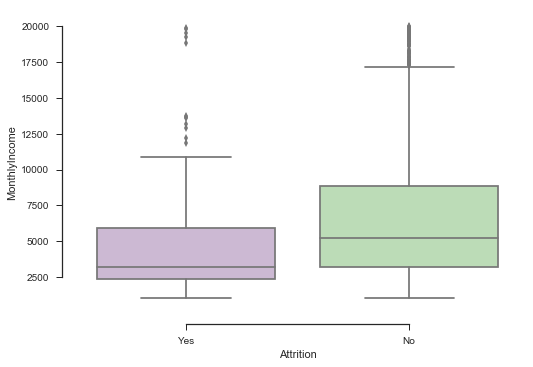

In [160]:
# Plot income vs.attrition

sns.set(style="ticks")
sns.boxplot(x='Attrition', y='MonthlyIncome',data=employee, palette="PRGn")
sns.despine(offset=12, trim=True)
plt.legend(loc='upper right')
plt.show()



# CHange to ANOVA

In [161]:
# need to change to ANOVA
# Test whether group differences are signficant.
for col in employee.loc[:,'HourlyRate':'JobLevel'].columns:
    print(col)
    print(stats.ttest_ind(
       employee[employee['Attrition'] == 'Yes'][col].dropna(),
        employee[employee['Attrition'] == 'No'][col].dropna()
    ))
    
    
for col in employee.loc[:,'PerformanceRating':'YearsWithCurrManager'].columns:
    print(col)
    print(stats.ttest_ind(
       employee[employee['Attrition'] == 'Yes'][col].dropna(),    #not married - divorced or single
        employee[employee['Attrition'] == 'No'][col].dropna()
    ))

HourlyRate
Ttest_indResult(statistic=-0.26228987349264493, pvalue=0.79313476899442426)
JobInvolvement
Ttest_indResult(statistic=-5.0241402285837289, pvalue=5.6770653567452894e-07)
JobLevel
Ttest_indResult(statistic=-6.5738378309536909, pvalue=6.795384780015255e-11)
PerformanceRating
Ttest_indResult(statistic=0.11068150493295091, pvalue=0.91188404210690033)
RelationshipSatisfaction
Ttest_indResult(statistic=-1.7594250082285654, pvalue=0.078713630484658376)
StandardHours
Ttest_indResult(statistic=nan, pvalue=nan)
StockOptionLevel
Ttest_indResult(statistic=-5.3047620976099115, pvalue=1.3010149660019924e-07)
TotalWorkingYears
Ttest_indResult(statistic=-6.6522546135024445, pvalue=4.0618781112668525e-11)
TrainingTimesLastYear
Ttest_indResult(statistic=-2.2829029923666897, pvalue=0.02257849973720126)
WorkLifeBalance
Ttest_indResult(statistic=-2.4548148934297767, pvalue=0.014211054989021308)
YearsAtCompany
Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)
YearsInCur

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


P < 0.05 for the following variables for Attrition:
 - Job Involvement
 - Job Level
 - Stock Option Level
 - Total Working Years
 - Training Times last year
 - Work life balance
 - Years at company
 - Years in current role
 - Years with current manager.
 Some of these are correlated, see below.
    

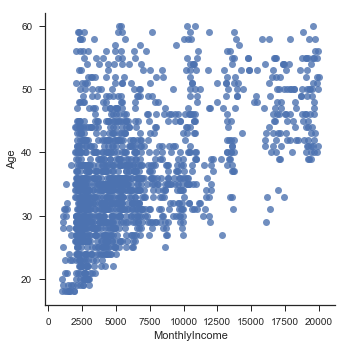

In [162]:
sns.lmplot( 'MonthlyIncome','Age', data=employee, fit_reg=False)

plt.show()


In [ ]:
# Interesting view of income vs. age. There are still people at age 60 who make the same as 20 year olds!

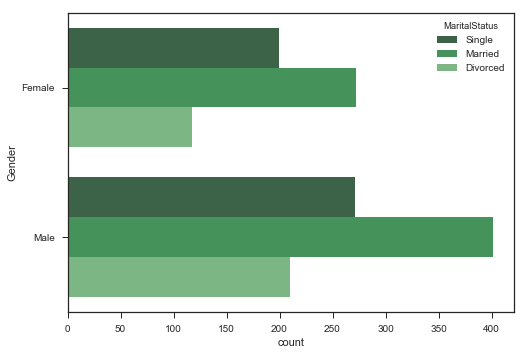

MaritalStatus  Divorced  Married  Single
Gender                                  
Female              117      272     199
Male                210      401     271
Power_divergenceResult(statistic=185.57551020408161, pvalue=3.4466043539347324e-38)


In [73]:
# Two Categorical Variables (Gender & Marital Status):

# Plot counts for each combination of levels.
sns.countplot(y="Gender", hue="MaritalStatus", data=employee, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(employee['Gender'], employee['MaritalStatus'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

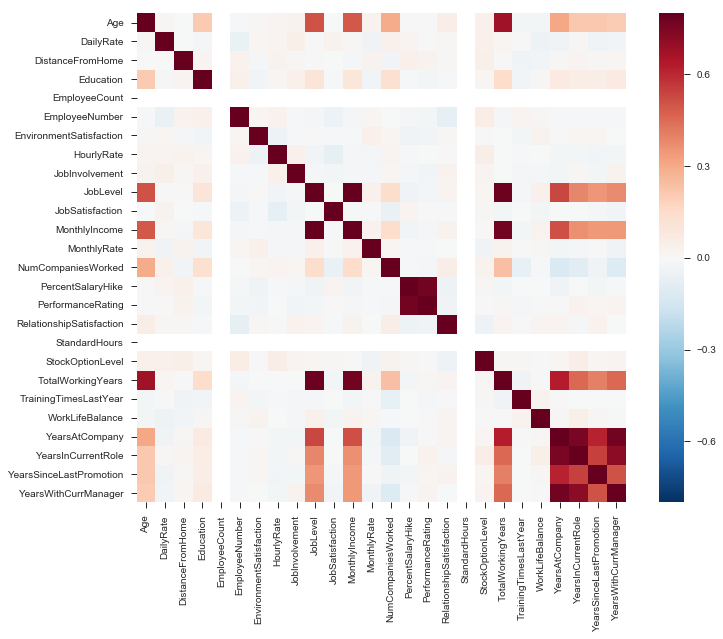

In [113]:
# Correlations:

corrmat = employee.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [122]:
# Looks like  Age and TotalWorkingYears are redundant (should check if this varies for females...)
# JobLevel & Monthly Income
# TotalWorkingYears & JobLevel
#  High levels of correlation between "Years at Company", "Years in current role", "Years since last promotion"
# and "years wih current manager"

# Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.

features = pd.get_dummies(employee['EmployeeNumber'])

means = employee[['Age','TotalWorkingYears','JobLevel']].mean(axis=0)
stds = employee[['Age','TotalWorkingYears','JobLevel']].std(axis=0)
features['age_yrs_level'] = ((employee[['Age','TotalWorkingYears','JobLevel']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = employee.loc[:, ['Age','TotalWorkingYears','JobLevel']]
plotdf['age_yrs_level'] = features['age_yrs_level'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                        Age  TotalWorkingYears  JobLevel  age_yrs_level
Age                1.000000           0.680381  0.509604       0.831044
TotalWorkingYears  0.680381           1.000000  0.782208       0.934491
JobLevel           0.509604           0.782208  1.000000       0.869685
age_yrs_level      0.831044           0.934491  0.869685       1.000000


In [ ]:
# This new variable can explain 80%+ of all 3 variables. 

In [150]:
#Look at Pay variables - all correlated?


empsel = employee[['HourlyRate','DailyRate','MonthlyRate','MonthlyIncome','StandardHours']]
empsel = empsel.sort_values(['HourlyRate'], axis = 0,ascending=False)
empsel.head()

,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,StandardHours
171,100,602,20989,2325,80
606,100,702,8306,2553,80
835,100,528,7108,4323,80
504,100,306,5630,4286,80
303,100,218,12241,6929,80


In [ ]:
# Obviously, these variables don't mean what I thought they meant, so I will need to explore further. 
# Based on analysis above (that job level and monthly income are correlated), I am going to use monthly income for pay scale.
#The hourly, daily and monthly "rates" don't seem to mean anything similar.

In [ ]:
# Creating 10 new variables:

# 1.YearsAtCompany / TotalWorkingYears - What percent of their career has the employee been with IBM
# 2.Age groups - use generational definitions (Millennials, GenX, Baby Boomers) to group ages

# 6. combine gender & marital status (married women, married men, etc)
# 7. Miles distance to work -split <=2 and > 2 
# 8. Tenure at IBM - split separately 0, 1, 2, up to 10, then 10+
# 9. Marital status - married or not married
# 10. age_yrs_level - a combined feature for age/yrs at co/job level